<a href="https://colab.research.google.com/github/jhmuller/energy_price/blob/main/energy_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import os
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dd = "/content/drive/MyDrive/data"
os.listdir(dd)
fpath = os.path.join(dd, "energy.xlsx")

In [44]:
orig = pd.read_excel(fpath)

In [45]:
orig.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,RESIDENTIAL,Unnamed: 5,Unnamed: 6,Unnamed: 7,COMMERCIAL,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,TRANSPORTATION,Unnamed: 17,Unnamed: 18,Unnamed: 19,TOTAL,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,NaN,NaN,NaN,Revenue,Sales,Customers,Price,Revenue,Sales,...,Customers,Price,Revenue,Sales,Customers,Price,Revenue,Sales,Customers,Price
1,Year,Month,State,Data Status,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,...,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh,Thousand Dollars,Megawatthours,Count,Cents/kWh
2,2022,9,AK,Preliminary,32819.84,142198.86,296767,23.08,39972.69,200620.72,...,1163,15.43,0,0,0,0,91245.04,462384.12,355145,19.73
3,2022,9,AL,Preliminary,442015.68,2822297.2,2344034,15.66,290203.68,2044990.4,...,8009,8.6,0,0,0,0,956084.53,7469965.2,2732313,12.8
4,2022,9,AR,Preliminary,220271.77,1694794.2,1451459,13,120345.42,1119295.3,...,41623,8.27,4.06,27.4,2,14.82,467922.07,4354159.6,1697719,10.75


In [46]:
print(orig.columns)
cols = ["Unnamed: 0", "Unnamed: 1", "Unnamed: 2", "Unnamed: 7"]
df = orig[cols]
df = df.iloc[1:,]

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'RESIDENTIAL',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'COMMERCIAL', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'INDUSTRIAL', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'TRANSPORTATION', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'TOTAL', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [47]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
#df["Date"] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [51]:
x = df.loc[np.char.isnumeric(df.Year)]

TypeError: ignored

In [52]:
df.head(55)
df["Year"] = df[pd.to_numeric(df['Year'], errors='coerce')]
df["Month"] = df[pd.to_numeric(df['Month'], errors='coerce')]
#df["Date"] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

KeyError: ignored

In [39]:
ne = df.loc[df.State == "PR"]
ne.columns
ne.head()

1,Year,Month,State,Cents/kWh


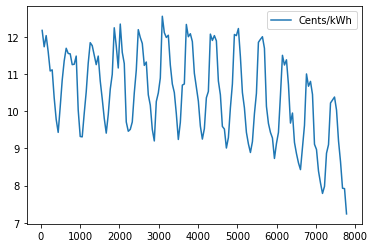

In [28]:
ne.plot(y="Cents/kWh")